# K nearest neighbour

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
cd E:\Fingertips notes and assignment\Kaggle

E:\Fingertips notes and assignment\Kaggle


In [6]:
data = pd.read_csv("Classified Data",index_col = 0)

In [7]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [9]:
data.isnull().count()

WTT             1000
PTI             1000
EQW             1000
SBI             1000
LQE             1000
QWG             1000
FDJ             1000
PJF             1000
HQE             1000
NXJ             1000
TARGET CLASS    1000
dtype: int64

# Standardize the variable
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.



In [10]:
from sklearn.preprocessing import StandardScaler


In [12]:
scalar = StandardScaler()

In [14]:
scalar.fit(data.drop('TARGET CLASS',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scalaed_feature = scalar.transform(data.drop('TARGET CLASS',axis = 1))

In [18]:
df_feat = pd.DataFrame(scalaed_feature,columns = data.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_feat,data['TARGET CLASS'],test_size = 0.3)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [29]:
pred = knn.predict(x_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(confusion_matrix(y_test,pred))

[[142  15]
 [ 14 129]]


In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       157
           1       0.90      0.90      0.90       143

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [39]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error_rate')

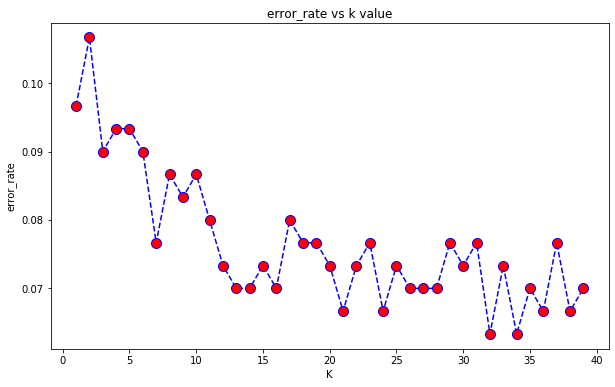

In [40]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = 'dashed',marker = 'o',markerfacecolor = 'red',markersize = 10)
plt.title('error_rate vs k value')
plt.xlabel('K')
plt.ylabel('error_rate')

In [48]:
knn = KNeighborsClassifier(n_neighbors = 32)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[146  11]
 [  8 135]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       157
           1       0.92      0.94      0.93       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

